# Analisi e classificazione delle email per la rilevazione di SPAM <br> Master in data science - Profession AI <br> Virginio Cocciaglia

ProfessionAI, azienda specializzata nell'automazione basata sull'Intelligenza Artificiale, vuole sviluppare una **libreria software** in grado di analizzare e classificare le email ricevute. L'obiettivo principale è identificare le email di tipo **SPAM** per condurre successivamente delle analisi approfondite sui contenuti.

Il CEO ha espresso l'esigenza di focalizzarsi su email SPAM per comprendere meglio le tendenze, i contenuti e i comportamenti associati. Queste informazioni verranno utilizzate per migliorare la sicurezza delle comunicazioni aziendali e perfezionare i filtri anti-spam.

## Obiettivi del Progetto

Il CTO ha fornito un dataset di email per realizzare le seguenti attività:

1. **Addestrare un classificatore** per identificare le email SPAM.
2. **Individuare i Topic principali** tra le email classificate come SPAM.
3. **Calcolare la distanza semantica** tra i topics ottenuti per valutare l'eterogeneità dei contenuti delle email SPAM.
4. **Estrarre dalle email NON SPAM** le informazioni sulle Organizzazioni menzionate.

## Valore Aggiunto

L'analisi delle email permette a ProfessionAI di ottenere diversi vantaggi strategici:

- **Miglioramento del filtro anti-spam**: un classificatore efficiente permette di ridurre significativamente il volume di email indesiderate che raggiungono la casella di posta, ottimizzando la gestione delle comunicazioni aziendali.
- **Analisi contenutistica approfondita**: l'individuazione dei principali topic trattati nelle email SPAM consente di ottenere informazioni preziose sui trend, tematiche e schemi ricorrenti, potenziando le strategie di **cybersecurity**.
- **Valutazione dell'eterogeneità**: la distanza semantica tra i topic consente di comprendere la **diversità dei contenuti SPAM**, utile per ottimizzare le difese contro un'ampia gamma di attacchi.
- **Identificazione di organizzazioni**: l'estrazione di organizzazioni dalle email legittime può essere sfruttata per **migliorare i processi di business intelligence** e gestire meglio le comunicazioni con clienti e partner.

## Conclusione

Il progetto offrirà a ProfessionAI un'analisi completa delle email ricevute, con particolare focus sull'identificazione delle email SPAM e l'analisi dei loro contenuti. Grazie alla segmentazione dei topic e all'analisi semantica, l'azienda potrà migliorare significativamente i propri filtri anti-spam e ottenere insight sui contenuti di maggiore rilevanza, nonché ottimizzare la gestione delle comunicazioni aziendali tramite l'estrazione di informazioni chiave dalle email legittime.

Questa soluzione incrementerà la **sicurezza delle comunicazioni** e migliorerà i processi decisionali aziendali, generando un vantaggio competitivo nel settore.

## Importazione delle librerie

Vengono innanzitutto importate tutte le librerie necessarie allo sviluppo del modello.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  cross_validate, StratifiedKFold
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import gensim
import gensim.corpora as corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
from pprint import pprint
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from collections import Counter, defaultdict

## Importazione e analisi descrittiva del dataset

Il dataset a disposizione, *spam_dataset.csv*, viene scaricato da github e trasformato in un dataframe di pandas. Successivamente si procede ad effettuare un'analisi descrittiva del dataset.


In [3]:
!git clone https://github.com/VirginioC/software-anti-spam.git

Cloning into 'software-anti-spam'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 1.82 MiB | 16.53 MiB/s, done.


In [4]:
CSV_URL = '/content/software-anti-spam/spam_dataset.csv'

df = pd.read_csv(CSV_URL)
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
print(f'Number of duplicated samples: {df.duplicated().sum()}')

Number of duplicated samples: 0


In [ ]:
print(f'Absolute frequencies of variable: '+
      f'{df["Unnamed: 0"].value_counts().sort_index()}')

Absolute frequencies of variable: Unnamed: 0
0       1
1       1
2       1
3       1
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    1
Name: count, Length: 5171, dtype: int64


In [ ]:
print(f'label classes: {df["label"].unique()}')
print(f'label_num classes: {df["label_num"].unique()}')

label classes: ['ham' 'spam']
label_num classes: [0 1]


Il dataset è costituito da **5171 samples** e non sono presenti dati mancanti per ognuna delle 4 colonne presenti. Inoltre, non è presente alcuna riga duplicata nella sua interezza.

Le 4 colonne del dataset sono:
* *Unnamed: 0*: è una variabile qualitativa costituita da quelli che sembrano essere dei codici identificativi numerici delle mail; essi vanno da 0 a 5170 pertanto non sono presenti indici ripetuti e si tratta dunque di codici univoci per ciascun sample.
* *label*: è una variabile qualitativa nominale binaria che rappresenta il target del problema di classifizazione dove la classe *ham* rappresenta una email leggittima e la classe *spam* una email illeggitima.
* *text*: in questa colonna sono racchiuse le diverse email degli utenti e si tratta dunque di elementi testuali.
* *label_num*: questa variabile rappresenta sempre il target ma codificato nel formato "dummy" con le due classi *ham* e *spam* che diventano rispettivamente 0 ed 1.

Avendo a disposizione due colonne per il target in formati diversi, la prima operazione importante da effettuare è un confronto tra di esse per capire se esistono differenze di valore. Per fare questo viene effettuato un label encoding sulla variabile *label* che poi viene messa a confronto con una semplice disuguaglianza alla variabile *label_num*.

In [ ]:
size_mapping = {'ham': 0, 'spam': 1}
df['label'] = df['label'].map(size_mapping)

differences = df[df['label'] != df['label_num']]

if differences.empty:
    print('All matches between targets are correct!')
else:
    print(f'There are {len(differences)} matches not corresponding')

All matches between targets are correct!


Non vi sono differenze tra i valori delle due colonne target, pertanto in seguito potrà essere utilizato *label* o *label_num* indifferentemente.

In precedenza si è verificata l'assenza di samples duplicati nella loro interezza, tuttavia, ciò non esclude la possibilità che siano presenti alcuni samples con lo stesso messaggio testuale nella colonna *text*. Si cercano allora tali eventuali duplicati e nel caso siano presenti vengono mandati a schermo insieme alle loro frequenze assolute. Viene utilizzato il metodo *duplicated* con *subset=["text"]* e con il *keep="first"* di default che conta i duplicati ad eccezione della prima occorrenza.

In [ ]:
print(f'Number of duplicated text: {df.duplicated(subset=["text"]).sum()}')

Number of duplicated text: 178


In [ ]:
duplicated_text_df = df[df.duplicated(subset='text')]
duplicated_text_df = duplicated_text_df.sort_values(by='text')

print('Absolute frequencies of duplicated text:')
duplicated_text_df['text'].value_counts()

Absolute frequencies of duplicated text:


,count
text,
"Subject: calpine daily gas nomination\n>\nricky a . archer\nfuel supply\n700 louisiana , suite 2700\nhouston , texas 77002\n713 - 830 - 8659 direct\n713 - 830 - 8722 fax\n- calpine daily gas nomination 1 . doc",19
Subject: \n,15
Subject: you can be smart !\n,2
"Subject: \nthis week only : f . ree gen . erlc vlag . ra\ncover the shipping , and we ' ll send youour product at no cost to prove its\neffectiveness .\nwon ' t last . . . hurry\nstop promos .\n",2
Subject: we ' ve found a school for you !\n,2
...,...
"Subject: cynergy ( apache )\nstacey / daren - - - - lisa hughes with cynergy ( agent for apache ) is requesting the\nforce majure letter for nov . 24 th due to the cornhusker plant not coming up .\ncan we get one typed up to send to her for apache .\nthanks ,\nmark",1
"Subject: cornshucker\nhere are the points the gas is to be nomintated at for september by supplier :\nwilliams :\nel paso 15 , 000\nlomax sterling 4 , 500\ndelhi cayanosa 5 , 500\napache ( by cynergy ) :\ndelhi 6 , 000\nlomax sterling 14 , 000\n( per nancy stivers )\nshe is to send me the nomination once complete .\nthanks ,\nmark\nx 33396",1
"Subject: cornhusker up on 24 th\nspoke with ken reisz ( operations mgr ) and he said the plant is due to be up\non friday nov . 24 th , so we will need to start nominating the gas for that day\non . he expects a full load to be pulled . of course , that what we thought\nbefore the last catastrophy .",1


Sono presenti 178 samples che hanno lo stesso identico messaggio testuale di almeno un altro sample associato ad un diverso codice identificativo. Di questi 178 samples 138 sono semplici duplicati mentre i restanti sono presenti più di una volta oltre alla prima occorrenza. In particolare è interessante notare la presenza di 15 samples, contando anche la prima occorrenza, contenenti un messaggio testuale vuoto.

É importante a questo punto capire se questi duplicati abbiano sempre le stesse labels. Per farlo è possibile raggruppare i duplicati presenti in *duplicated_text_df* per testo e applicare un filtro che consideri solo i duplicati che abbiano classi diverse come label.

In [ ]:
duplicated_text_with_different_labels = duplicated_text_df.groupby('text').filter(
    lambda x: x['label'].nunique() > 1)

if duplicated_text_with_different_labels.empty:
    print('All samples with duplicated text have the same label.')
else:
    print('Some samples with duplicated text have different labels.')

All samples with duplicated text have the same label.


Il dataframe *duplicated_text_with_different_labels* è vuoto è ciò implica che non ci sono discrepanze tra le labels dei duplicati.

Esclusa la presenza di differenze tra le labels, ai fini del presente task si sceglie di mantenere nel dataset i samples contenenti lo stesso messaggio testuale. Infatti, la presenza di mail con lo stesso contenuto, anche provenienti da diversi mittenti, rappresenta una situazione reale.

Per quanto riguarda la variabile *Unnamed: 0*, si è detto che si tratta con buona probabilità di un qualche tipo di codice identificativo univoco della mail. Essa non ha nessun tipo di utilità per il task e potrà non essere presa in considerazione, tuttavia, può risultare interessante costruire uno scatterplot che mette a confronto gli indici con il target.

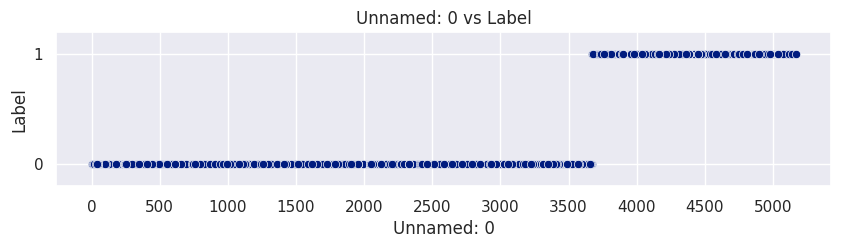

In [ ]:
sns.set_theme(palette='dark')
plt.figure(figsize=(10, 2))

sns.scatterplot(x='Unnamed: 0', y='label', data=df)

plt.xticks(range(0, df['Unnamed: 0'].max() + 1, 500))
plt.ylim(-0.2, 1.2)
plt.yticks([0, 1])
plt.title('Unnamed: 0 vs Label')
plt.xlabel('Unnamed: 0')
plt.ylabel('Label')

plt.show()

Dallo scatterplot si evince che i samples che hanno indici che vanno da 0 a 3700 circa sono email "ham" mentre i restanti samples da 3700 circa a 5170 sono "spam".

### Frequenze assolute e relative del target

Si possono, di seguito, ricavare le frequenze assolute e relative della variabile target *label* per conoscere precisamente le quantità di commenti *ham* (0) e *spam* (1) presenti nel dataset. Viene anche costruito il relativo barplot.

In [ ]:
label_df = pd.DataFrame(
    {'Counts': df['label'].value_counts(),
     'Percentages %': (df['label'].value_counts(normalize=True)*100).round(2)})

label_df

,Counts,Percentages %
label,,
0,3672,71.01
1,1499,28.99


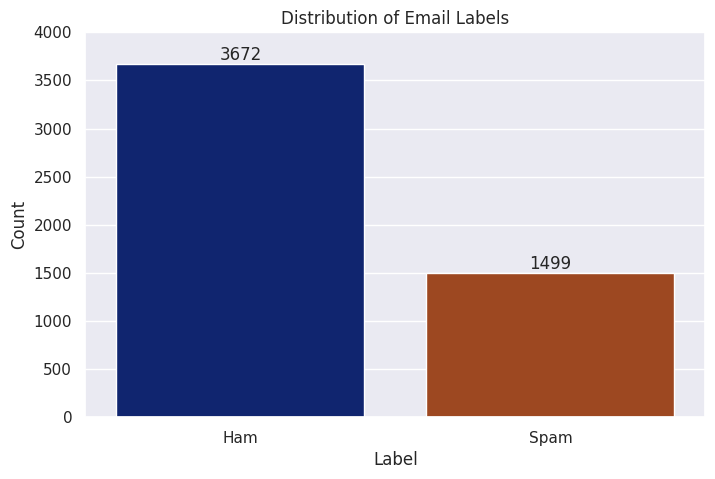

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='label',
                   data=df,
                   hue='label',
                   legend=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom')

plt.title('Distribution of Email Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.yticks(range(0, 4010, 500))

plt.show()

Il 71 % dei samples (3672 elementi) è costituito da email *ham* (0) mentre il 29 % (1499 elementi) da email *spam* (1). Ciò significa che le classi del target *label* non sono bilanciate e potrebbe essere necessario utilizzare in seguito tecniche di bilanciamento.

## Preprocessing dei dati

### Text Cleaner

Come primo passaggio è necessario preprocessare il testo eliminando l'insieme di token che non danno contributo significativo a livello semantico. Ciò può essere fatto creando la funzione *text_cleaner*
che effettua le seguenti operazioni:
* Conversione di tutte le parole in lowercase tramite il metodo *lower*.
* Rimozione della punteggiatura, di tutti i caratteri speciali e dei numeri tramite la funzione *sub* della libreria *re*.
* Rimozione usando la libreria *nltk* di tutte le stopwords della lingua inglese (parole che non contribuiscono in maniera determinante al significato del testo stesso) e delle delle stopword riguardanti l'ambito in esame e lemmatizzazione (riduzione delle parole dalla forma flessa alla forma canonica) tramite il *WordNetLemmatizer* sempre all'interno di *nltk*.
* Rimozione di tutti gli spazi bianchi extra sempre tramite la funzione *sub* della libreria *re*.

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stopwords = set(stopwords.words('english'))
email_stopwords = {'from', 'to', 'subject', 'cc', 'bcc', 're', 'fwd', 'hello',
                   'hi', 'regards', 'unsubscribe', 'click', 'attachment',
                   'original', 'sent', 'received'}
all_stopwords = stopwords.union(email_stopwords)

lemmatizer = WordNetLemmatizer()

def text_cleaner(sentence):

    '''
    Cleans and preprocesses a given text sentence.

    This function performs the following operations:
    1. Converts the text to lowercase.
    2. Removes punctuation by replacing it with spaces.
    3. Removes digits.
    4. Filters out English stopwords as well as common email-related terms.
    5. Lemmatizes the remaining words.
    6. Removes extra whitespace from the text.

    Parameters:
    - sentence (str): The input text sentence to be cleaned and preprocessed.

    Returns:
    - str: The cleaned and preprocessed text sentence.
    '''

    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    sentence = re.sub(r'\d+', '', sentence)
    sentence = ' '.join([word for word in sentence.split()
                         if word not in all_stopwords])
    sentence = ' '.join([lemmatizer.lemmatize(word)
                         for word in sentence.split()])
    sentence = re.sub(r'\s+', ' ', sentence).strip()

    return sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['text'] = df['text'].apply(text_cleaner)
df['text']

,text
0,enron methanol meter follow note gave monday p...
1,hpl nom january see attached file hplnol xl hp...
2,neon retreat ho ho ho around wonderful time ye...
3,photoshop window office cheap main trending ab...
4,indian spring deal book teco pvr revenue under...
...,...
5166,put ft transport volume decreased contract tha...
5167,following noms hpl take extra mmcf weekend try...
5168,calpine daily gas nomination julie mention ear...
5169,industrial worksheet august activity attached ...


Il corpus testuale appare ora "pulito".

### Text Array e Target Array

Successivamente vengono creati l'array numpy **X** contenente la colonna del dataset con i messaggi testuali (*text*) e l'array numpy **y** del target contenente la colonna *label*.

In [ ]:
X = df['text'].values
y = df['label'].values

print('Text array X')
print(X)
print(X.shape)

print('\nTarget array y')
print(y)
print(y.shape)

Text array X
['enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purpose'
 'hpl nom january see attached file hplnol xl hplnol xl'
 'neon retreat ho ho ho around wonderful time year neon leader retreat time know time year extremely hectic tough think anything past holiday life go past week december january like think minute calender handed beginning fall semester retreat scheduled weekend january youth minister conference brad dustin connected week going change date following weekend january come part need think think agree important u get together time recharge battery get far spring semester lot trouble difficult u get away without kid etc brad came potential alternative get together weekend let know prefer first option would retreat similar done past several year year could go heartland country inn www com outside brenham nice place b

Si ottengono correttamente due vettori costituiti da 5171 elementi.

## **CLASSIFICAZIONE**

Una volta preprocessati i dati è possibile passare al problema di classificazione binaria ham/spam. Per fare ciò si sceglie di testare i seguenti modelli di ML che sembrano essere i più promettenti:
* **Logistic Regression**
* **Complement Naive Bayes**
* **Support Vector Machines**
* **Random Forest**

### Vectorizer, modelli e metriche

Per prima cosa deve essere istanziato un vectorizer in grado di trasformare il corpus testuale in vettori numerici. Si sceglie di utilizzare la funzione **tf-idf** (term frequency-inverse document frequency) che da più peso ai termini più rari e penalizza quelli più comuni rispetto al count vectorizer che conta semplicemente le occorrenze. Per farlo viene utilizzato *TfidfVectorizer* di scikit-learn scegliendo di valutare la totalità delle parole essendo il dataset di ridotte dimensioni.

Successivamente vengono istanziati anche i modelli da valutare, forniti da scikit-learn, all'interno del dizionario *models*. In ognuno di essi viene specificato il parametro *class_weight='balanced'*, ad eccezione del *ComplementNB*. Questo parametro bilancia il target applicando dei pesi inversamente proporzionali alle frequenze delle classi 0 ed 1.

Infine, vengono definite le metriche che si andranno a valutare per ciascun modello, che sono le seguenti:
1. **Accuracy**: percentuale di classificazioni corrette.
2. **Precision**: percentuale delle classificazioni positive che sono effettivamente positive ( TP / (TP + FP) ).
3. **Recall**: percentuale delle osservazioni positive che vengono classificate come positive ( TP / (TP + FN) ).
4. **F1-score**: media armonica tra precision e recall ( 2 precision * recall / (precision + recall) ).




In [ ]:
tfidf = TfidfVectorizer()

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Complement Naive Bayes': ComplementNB(),
    'Support Vector Machine': SVC(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42)}

metrics = ['accuracy', 'precision', 'recall', 'f1']

### Training e evaluation dei modelli di classificazione binaria

Una volta definiti il vectorizer, i modelli e le metriche, si può definire la funzione ***train_model*** in grado di addestrare un generico modello di machine learning fornito in input (*model*). In tale funzione viene, innanzitutto, costruita una pipeline, tramite *Pipeline* di scikit-learn, che raccoglie al suo interno il vectorizer *tfidf* e il modello di ML *model*. Dopodichè viene effettuata una **K-Fold Cross-Validation** utilizzando la funzione *cross_validate* di scikit-learn con i seguenti argomenti al suo interno:
* Come *estimator* si utilizza la pipeline precedentemente costruita contenente vettorizzatore e classificatore.
* *X* ed *y* (array definiti in precedenza) rispettivamente come dati e target su cui effettuare la cross-validation.
* Come parametro *cv*, che regola lo splitting dei dati, viene utilizzata la funzione *StratifiedKFold* che preserva la distribuzione delle classi del target per ciascun fold. In essa vengono specificati come argomenti il numero di fold *n_splits=5*, *shuffle=True* che mescola casualmente i dati prima di suddividerli e *random_state=42* che fissa il seme del generatore di numeri casuali.
* Come *scoring* vengono specificate tutte le metriche istanziate precedentemente *metrics* e viene inoltre anche utilizzato l'argomento *return_train_score=True* in modo da calcolare anche le metriche sul train set.

La funzione restituisce un dizionario *cv_results* che include tutti i valori delle metriche per ciascuno dei 5 fold, sia per il train set che per il test.




In [ ]:
def train_model(model):

    '''
    Trains a model using TF-IDF vectorization and stratified cross-validation.

    This function builds a pipeline to vectorize text data with TF-IDF and
    trains the specified classifier. It evaluates performance using 5-fold
    stratified cross-validation and returns both training and validation scores.

    Parameters:
    - model: The machine learning model to be trained in the pipeline.

    Returns:
    - dict: Cross-validation results, including training and validation scores
            for each fold and scoring metric.
    '''

    pipeline = Pipeline([('tfidf', tfidf),
                         ('clf', model)])

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_results = cross_validate(pipeline,
                                X,
                                y,
                                cv=kf,
                                scoring=metrics,
                                return_train_score=True)

    return cv_results

Viene poi definita la funzione *evaluate_model* che prende in input il nome del generico modello *model_name* e i risultati *cv_results* che si ottengono con la funzione di training appena creata. Tale funzione di valutazione calcola, per ciascuna metrica, la media degli scores ottenuti sui 5 fold, sia per il train set che per il test set. Ciò che restituisce la funzione è, infatti, una tupla contenente il nome del modello *model_name* e due liste con gli scores medi sul train e test set: *train_mean_scores* e *test_mean_scores*.


In [ ]:
def evaluate_model(model_name, cv_results):

    '''
    Evaluates model performance by calculating mean cross-validation scores.

    This function computes the mean of training and validation scores from
    cross-validation results for each specified metric.

    Parameters:
    - model_name (str): The name of the model being evaluated.
    - cv_results (dict): Cross-validation results containing training and
                         validation scores for each metric.

    Returns:
    - tuple: Contains the model name, list of mean training scores, and list of
             mean validation scores for each metric.
    '''

    train_mean_scores = []
    test_mean_scores = []

    for metric in metrics:
        train_mean = round(np.mean(cv_results[f'train_{metric}']), 2)
        test_mean = round(np.mean(cv_results[f'test_{metric}']), 2)

        train_mean_scores.append(train_mean)
        test_mean_scores.append(test_mean)

    return model_name, train_mean_scores, test_mean_scores

A questo punto, grazie alle precedenti funzioni, è possibile valutare contemporaneamente le prestazione di tutti i modelli selezionati. A tale scopo viene utilizzato un ciclo for che itera su ciascun modello presente nel dizionario *models* e per ognuno di essi vengono eseguite le seguenti operazioni:
* Addestramento tramite la funzione *train_model* con cui si ottengono  tutti i valori delle metriche per ciascuno dei 5 fold, sia per il train set che per il test.
* Restituzione del nome del modello e delle liste con gli scores medi sul train e test set tramite la funzione *evaluate_model*.
* Salvataggio del nome del modello e degli scores medi nelle due liste *models_train_mean_scores* e *models_test_mean_scores*.

Una volta raccolti gli scores medi per ciascun modello vengono mandati a schermo i risultati in due tabelle, una per il train set ed una per il test, utilizzando la libreria *tabulate*.


In [ ]:
models_train_mean_scores = []
models_test_mean_scores = []

for model_name, model in models.items():
    cv_results = train_model(model)
    model_name, train_mean_scores, test_mean_scores = evaluate_model(model_name,
                                                                     cv_results)
    models_train_mean_scores.append([model_name] + train_mean_scores)
    models_test_mean_scores.append([model_name] + test_mean_scores)

headers = ['Model'] + [f'{metric}' for metric in metrics]

print('Training Scores:')
print(tabulate(models_train_mean_scores,
               headers=headers,
               tablefmt='fancy_grid',
               floatfmt='.2f'))

print('\nTesting Scores:')
print(tabulate(models_test_mean_scores,
               headers=headers,
               tablefmt='fancy_grid',
               floatfmt='.2f'))

Training Scores:
╒════════════════════════╤════════════╤═════════════╤══════════╤══════╕
│ Model                  │   accuracy │   precision │   recall │   f1 │
╞════════════════════════╪════════════╪═════════════╪══════════╪══════╡
│ Logistic Regression    │       0.98 │        0.92 │     1.00 │ 0.96 │
├────────────────────────┼────────────┼─────────────┼──────────┼──────┤
│ Complement Naive Bayes │       0.99 │        0.99 │     0.96 │ 0.98 │
├────────────────────────┼────────────┼─────────────┼──────────┼──────┤
│ Support Vector Machine │       1.00 │        1.00 │     1.00 │ 1.00 │
├────────────────────────┼────────────┼─────────────┼──────────┼──────┤
│ Random Forest          │       1.00 │        1.00 │     1.00 │ 1.00 │
╘════════════════════════╧════════════╧═════════════╧══════════╧══════╛

Testing Scores:
╒════════════════════════╤════════════╤═════════════╤══════════╤══════╕
│ Model                  │   accuracy │   precision │   recall │   f1 │
╞════════════════════════╪════

I risultati mostrano che con tutti i modelli vengono raggiunte delle ottime prestazioni, tuttavia, il migliore tra questi risulta essere la **Support Vector Machine**. Con tale modello si hanno delle prestazioni perfette sul train set, ogni metrica è pari a 1.00, e delle prestazioni quasi perfette sul test set con accuracy 0.98, precision 0.96, recall 0.99 ed f1 0.97.

### Scelta del miglior modello e ricerca dei migliori parametri tramite Grid Search

Si è visto che con il modello di SVM si ottengono delle prestazioni molto soddisfacenti e viene pertanto scelto tra tutti, tuttavia, si può comunque cercare di migliorare ulteriormente le metriche attraverso un fine tuning degli iperparametri. Per fare questo è possibile effettuare una **Grid Search**: tecnica che permette di testare diversi parametri di un modello alla ricerca della configurazione che massimizza la metrica desiderata.<br>
Viene quindi utilizzato *GridSearchCV* di scikit-learn specificando in esso i seguenti parametri:
* Come *estimator* viene utilizzata la pipeline contenente il vettorizzatore *tfidf* e il classificatore *svc*.
* Come *param_grid* viene utilizzata la griglia dei parametri da valutare *param_grid_svc* che consiste in un dizionario contenente i kernel ['linear', 'poly', 'rbf', 'sigmoid'] e i parametri di regolarizzazione C [0.1, 1, 10, 100].
* Come *scoring* viene utilizzata l'accuracy, ciò significa che la grid search cercherà i migliori parametri che ottimizzano tale metrica.

Infine, si utilizza il metodo *fit* di *GridSearchCV* per effettuare la cross-validation sull'intero dataset e i metodi *best_params_* e *best_score_* per mandare a schermo la migliore combinazione di parametri e la relativa accuracy media sul test set.




In [ ]:
svc = SVC(class_weight='balanced',
          random_state=42)

param_grid_svc = {'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'clf__C': [0.1, 1, 10, 100]}

pipeline = Pipeline([('tfidf', tfidf),
                     ('clf', svc)])

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_svc = GridSearchCV(estimator=pipeline,
                      param_grid=param_grid_svc,
                      cv=kf,
                      scoring='accuracy',
                      n_jobs=-1)
gs_svc.fit(X, y)

print(f'Best parameters SVM: {gs_svc.best_params_}')
print(f'Best mean test accuracy SVM: {gs_svc.best_score_:.4f}')

Best parameters SVM: {'clf__C': 10, 'clf__kernel': 'rbf'}
Best mean test accuracy SVM: 0.9874


I risultati della grid search mostrano che gli iperparametri della SVM che ottimizzano l'accuracy media sul test set sono: kernel gaussiano (rbf) e parametro di regolarizzazione C uguale a 10. Tale accuracy è pari a circa il 99 % e rappresenta un leggero ma apprezzabile miglioramento rispetto all'accuracy ottenuta prima del fine tuning (98 %).

Si procede allora a riaddestrare il modello di SVM con gli iperparametri ottimizzati e a stampare tutte le metriche d'interesse.

In [ ]:
best_svc = gs_svc.best_estimator_['clf']

cv_results_svc = train_model(best_svc)
model_name, train_mean_scores, test_mean_scores = evaluate_model('Best SVM',
                                                                 cv_results_svc)

headers = ['Model'] + [f'{metric}' for metric in metrics]

print('Training Scores:')
print(tabulate([[model_name] + train_mean_scores],
               headers=headers,
               tablefmt='fancy_grid',
               floatfmt='.2f'))

print('\nTesting Scores:')
print(tabulate([[model_name] + test_mean_scores],
               headers=headers,
               tablefmt='fancy_grid',
               floatfmt='.2f'))

Training Scores:
╒══════════╤════════════╤═════════════╤══════════╤══════╕
│ Model    │   accuracy │   precision │   recall │   f1 │
╞══════════╪════════════╪═════════════╪══════════╪══════╡
│ Best SVM │       1.00 │        1.00 │     1.00 │ 1.00 │
╘══════════╧════════════╧═════════════╧══════════╧══════╛

Testing Scores:
╒══════════╤════════════╤═════════════╤══════════╤══════╕
│ Model    │   accuracy │   precision │   recall │   f1 │
╞══════════╪════════════╪═════════════╪══════════╪══════╡
│ Best SVM │       0.99 │        0.97 │     0.99 │ 0.98 │
╘══════════╧════════════╧═════════════╧══════════╧══════╛


Gli scores ottenuti con la SVM ottimizzata sono estremamente soddisfacenti, le metriche sul test set tendono ancora maggiormente alla perfezione: accuracy del 99 %, precision del 97 %, recall del 99 % ed f1 score del 98 %.

Di seguito, risulta utile anche calcolare la **matrice di confusione** della SVM. Essa riassume visivamente le performance del modello mostrando quanti e quali errori ha commesso. Per calcolare tale matrice è innanzitutto necessario ricavare le previsioni del modello e lo si può fare attraverso l'utilizzo di *cross_val_predict* di scikit-learn specificando come argomenti: la pipeline con il tfidf e il best model *gs_svc.best_estimator_*, gli array *X* ed *y* ed il parametro *cv*, che regola lo splitting dei dati, che è sempre quello usato finora *kf*.
Ottenute le previsioni del modello *y_pred_cv* con la cross-validation la matrice di confusione può essere ottenuta attraverso la funzione *confusion_matrix*, sempre di scikit-learn, con argomenti *y* e *y_pred_cv*. Inoltre, per visualizzare meglio la matrice si può utilizzare la funzione *heatmap* di seaborn.

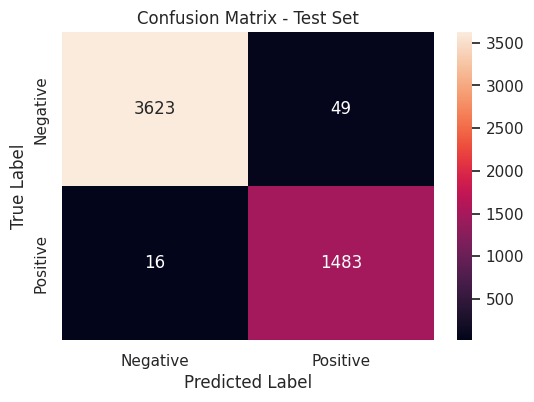

In [ ]:
y_pred_cv = cross_val_predict(gs_svc.best_estimator_, X, y, cv=kf)

cm = confusion_matrix(y, y_pred_cv)

plt.figure(figsize=(6, 4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

La matrice di confusione mostra come il modello predica in maniera corretta 1483 esempi positivi (spam) sbagliando 49 volte (falsi positivi) e 3623 esempi negativi (ham) sbagliando 16 volte (falsi negativi).

In conclusione si può affermare che il modello costruito è in grado di filtrare in maniera egregia le email ***spam*** dalle email ***ham***.

## **TOPIC MODELING**

Dopo aver costruito il modello di classificazione delle email, si passa all'individuazione dei topic principali tra le email classificate come SPAM. Questo task del NLP viene chiamato **Topic Modeling** e si tratta di un processo **non supervisionato** che permette di raggruppare e di definire quali sono i documenti che trattano lo stesso o gli stessi argomenti. É importante però sottolineare che l'argomento del topic non viene individuato ma va dedotto.



Come primo passaggio viene definito l'array contenente esclusivamente le email spam *X_spam*.

In [ ]:
X_spam = df[df['label'] == 1]['text'].values

print(f'Number of spam emails: {len(X_spam)}')
print(f'First spam email: {X_spam[0]}')

Number of spam emails: 1499
First spam email: photoshop window office cheap main trending abasement darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clear bayda inconveniencing managing represented smartness hashish academy shareholder unload badness danielson pure caffein spaniard chargeable levin


Successivamente si procede a tokenizzare ciascuna email presente nelle email spam e viene creato il dizionario delle parole usando il modulo *corpora* della libreria *gensim*: ad ogni parola viene associato un indice numerico univoco. Le parole con meno di due lettere vengono escluse, essendo con buona probabilità non informative.

Inoltre, vengono esclusi dalla ricerca dei topic anche i tag HTML, le proprietà e gli attributi CSS, le unità di misura e altri token poco informativi e generici come 'http', 'www' e 'com'. In un contesto di email, questi termini suggeriscono contenuti generati automaticamente o messaggi promozionali costruiti con codice HTML per visualizzare grafiche, link, o formattazione complessa. Dunque, HTML viene utilizzato in molte email spam per creare messaggi visivamente accattivanti, tuttavia, ai fini della ricerca dei topic principali risulta utile escludere tutti questi termini tecnici concentrandosi sui contenuti.


In [ ]:
stopwords_topics = set(['http', 'nbsp', 'www', 'com', 'font', 'align', 'color',
                        'border', 'color', 'height', 'width', 'size', 'face',
                        'td', 'tr', 'href', 'src', 'pt', 'nd', 'style', 'gif',
                        'bgcolor', 'center'])

tokenized_data = [[word for word in email.split() if word not in
                   stopwords_topics and len(word) > 1] for email in X_spam]

dictionary = corpora.Dictionary(tokenized_data)

print(f'Number of documents preprocessed (spam emails): {dictionary.num_docs}')
print(f'Dictionary of spam email words: {dictionary.token2id}')
print(f'Number of spam email words: {len(dictionary)}')

Number of documents preprocessed (spam emails): 1499
Dictionary of spam email words: {'abasement': 0, 'academy': 1, 'affluent': 2, 'badness': 3, 'bayda': 4, 'blameworthy': 5, 'caffein': 6, 'chargeable': 7, 'charm': 8, 'cheap': 9, 'chlorophyll': 10, 'clear': 11, 'cuvier': 12, 'danielson': 13, 'darer': 14, 'diagrammatic': 15, 'fogarty': 16, 'fortuitous': 17, 'hashish': 18, 'inconveniencing': 19, 'irvin': 20, 'levin': 21, 'lighthearted': 22, 'main': 23, 'managing': 24, 'office': 25, 'orinoco': 26, 'parkhouse': 27, 'photoshop': 28, 'pornographic': 29, 'prudently': 30, 'pure': 31, 'railroad': 32, 'represented': 33, 'robed': 34, 'shareholder': 35, 'smartness': 36, 'spaniard': 37, 'taster': 38, 'trending': 39, 'undergone': 40, 'unload': 41, 'window': 42, 'anti': 43, 'anything': 44, 'author': 45, 'bad': 46, 'best': 47, 'better': 48, 'bombahakcx': 49, 'condition': 50, 'delivery': 51, 'depressant': 52, 'difficult': 53, 'easy': 54, 'enough': 55, 'erection': 56, 'ever': 57, 'excuse': 58, 'found': 

Da ognuna delle 1499 email spam sono state ricavate 35339 parole che costituiscono il dizionario.

A questo punto, si può utilizzare la funzione *doc2bow* per convertire ogni email nel formato **Bag of Words (BoW)**: per ogni parola presente in ogni singola email, *doc2bow* genera una coppia (id, count), dove id è l'identificatore della parola nel dizionario e count è il numero di volte in cui la parola appare nell'email.

In [ ]:
corpus = [dictionary.doc2bow(email) for email in tokenized_data]

print(f'First element in corpus: {corpus[0]}')

First element in corpus: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)]


### LDA e Coherence

Infine, per ricavare i diversi topic viene utilizzato il **Latent Dirichlet Allocation (LDA)**: modello statistico generativo che consente di spiegare perché alcune parti dei dati che si stanno osservando, sono simili. Tale modello viene implementato grazie a *LdaMulticore* di gensim specificando come argomenti il corpus e il dizionario precedentemente ricavati, il numero di topic desiderato e il numero di volte in cui il modello scorre attraverso il corpus *passes*.<br> Come *passes* si sceglie di utilizzare 10, il numero di topic invece viene scelto in modo iterativo basandosi sulla **Coherence** che si ottiene. La coerenza è una misura che valuta la qualità dei topic generati da modelli come l'LDA, indicando quanto bene i topic rappresentano insiemi di parole che sono semanticamente correlati e che gli utenti possono interpretare in modo intuitivo. La coerenza viene calcolata tramite *CoherenceModel*, sempre di gensim, usando come argomenti il modello LDA, i dati tokenizzati, il dizionario delle parole e il parametro *coherence='c_v'* (C_v è una delle misure più comuni e affidabili per il topic modeling interpretativo).<br> Dunque, al variare del numero di topic da 2 a 15, viene costruito il modello LDA con *LdaMulticore*, costruito il *CoherenceModel* e calcolata la *coherence_score* col metodo *get_coherence*. Il valore del *coherence_score* può variare da 0 a 1, dove valori più vicini a 1 indicano una coerenza maggiore tra le parole del topic (topic più interpretabili), mentre valori vicini a 0 indicano topic con parole meno correlate.


In [ ]:
coherences = []

for num_topics in range(2, 16):

    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary,
                             num_topics=num_topics,
                             passes=10,
                             random_state=1)

    coherence_lda_model = CoherenceModel(model=lda_model,
                                         texts=tokenized_data,
                                         dictionary=dictionary,
                                         coherence='c_v')

    coherence_score = coherence_lda_model.get_coherence()
    coherences.append((num_topics, coherence_score))

    print(f'Number of topics: {num_topics}, Coherence: {coherence_score:.2f}')

Number of topics: 2, Coherence: 0.65
Number of topics: 3, Coherence: 0.61
Number of topics: 4, Coherence: 0.57
Number of topics: 5, Coherence: 0.64
Number of topics: 6, Coherence: 0.55
Number of topics: 7, Coherence: 0.56
Number of topics: 8, Coherence: 0.56
Number of topics: 9, Coherence: 0.49
Number of topics: 10, Coherence: 0.48
Number of topics: 11, Coherence: 0.53
Number of topics: 12, Coherence: 0.53
Number of topics: 13, Coherence: 0.51
Number of topics: 14, Coherence: 0.47
Number of topics: 15, Coherence: 0.47


Si osserva che con 2 topic viene ottenuta la coerenza più elevata, pari a 0.65. Tuttavia, 2 topic possono essere troppo pochi per descrivere il contenuto delle email spam e si preferisce utilizzare **5 topic** con cui si ottiene una coerenza leggermente inferiore, pari a **0.64**. Il valore raggiunto è molto buono ed indica che le parole raggruppate in ciascun topic sono abbastanza coerenti semanticamente aiutando nell'individuazione di un tema riconoscibile.

Si costruisce allora l'*lda_model* con *num_topics=5* e si stampano i topic ottenuti utilizzando la funzione *print_topics* del modello e *pprint* della libreria *pprint*.

In [ ]:
num_topics = 5

lda_model = LdaMulticore(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         passes=10,
                         random_state=1)

print('Topics spam emails:\n')
pprint(lda_model.print_topics())

Topics spam emails:

[(0,
  '0.009*"pill" + 0.005*"get" + 0.004*"viagra" + 0.004*"cialis" + '
  '0.004*"prescription" + 0.003*"best" + 0.003*"drug" + 0.003*"soft" + '
  '0.003*"price" + 0.003*"save"'),
 (1,
  '0.007*"computron" + 0.005*"contact" + 0.004*"message" + 0.004*"free" + '
  '0.003*"please" + 0.003*"price" + 0.003*"link" + 0.003*"remove" + '
  '0.003*"sale" + 0.003*"mail"'),
 (2,
  '0.007*"email" + 0.004*"br" + 0.003*"please" + 0.003*"time" + 0.003*"get" + '
  '0.003*"line" + 0.003*"new" + 0.002*"money" + 0.002*"family" + '
  '0.002*"message"'),
 (3,
  '0.006*"window" + 0.005*"adobe" + 0.005*"microsoft" + 0.005*"xp" + '
  '0.004*"cd" + 0.004*"professional" + 0.004*"office" + 0.004*"price" + '
  '0.004*"software" + 0.003*"pro"'),
 (4,
  '0.013*"company" + 0.007*"statement" + 0.006*"stock" + 0.006*"security" + '
  '0.006*"information" + 0.006*"price" + 0.005*"may" + 0.005*"investment" + '
  '0.004*"within" + 0.004*"report"')]


Di seguito vengono descritti i 5 topic delle email spam ottenuti (ogni topic contiene le 10 parole con i pesi maggiori):

* **Topic 0 - Vendita di farmaci e prodotti sanitari sensibili:**<br>Questo topic è fortemente orientato verso il marketing di farmaci, in particolare quelli per la disfunzione erettile come il Viagra e il Cialis. Termini come "prescription" suggeriscono che il contenuto si riferisca a medicinali che normalmente richiederebbero una ricetta. Altri termini, come "best", "soft", "price" e "save", indicano l'intenzione di promuovere prodotti e attrarre l'attenzione del lettore su offerte vantaggiose.
* **Topic 1 - Prodotti o servizi commerciali con contatto diretto:**<br>Questo topic sembra riferirsi a messaggi promozionali e comunicazioni commerciali. La presenza di parole come "free", "contact" e "sale" indica un forte focus su offerte e inviti all'azione per contattare il mittente o partecipare a vendite. Il termine "computron" può fare riferimento a un marchio o prodotto specifico, suggerendo un contesto tecnologico.
* **Topic 2 -  Email personali/Truffa:**<br>Questo topic include termini generali legati alla comunicazione via email. Le parole "please" e "get" possono indicare messaggi che richiedono azioni, come cliccare su un link o fornire informazioni personali. La presenza di "money" e "family" può suggerire schemi di phishing o truffe che promettono guadagni o aiuti finanziari.
* **Topic 3 - Software e prodotti tecnologici:**<br>Questo topic si concentra su software e prodotti informatici, in particolare quelli di aziende famose come Microsoft e Adobe. Le parole "xp" e "office" indicano riferimenti a versioni specifiche di software. Le parole chiave suggeriscono la promozione di software pirata o offerte legate a tecnologie obsolete, comuni in email spam.
* **Topic 4 - Finanza e investimenti:**<br>Questo topic appare orientato verso investimenti e finanza, con termini come "stock", "security" e "investment". Le parole come "statement" e "report" suggeriscono un contenuto che potrebbe riguardare l'analisi finanziaria o la promozione di opportunità di investimento, spesso presenti nelle email di spam per attrarre investitori inconsapevoli.

In sintesi ciascun topic delle email spam ha il suo tema specifico con differenti **pattern di manipolazione**:
* Topic 0 (Farmaci): sfrutta il desiderio di privacy e risparmio per medicinali sensibili.
* Topic 1 (Commerciale): usa l'urgenza e le offerte limitate come leva psicologica.
* Topic 2 (Personale): fa leva sulle emozioni con riferimenti familiari e finanziari.
* Topic 3 (Software): sfrutta il desiderio di accedere a software costosi a prezzi ridotti.
* Topic 4 (Finanza): utilizza un linguaggio professionale per apparire legittimo.

Un altro aspetto interessante da analizzare è l'**interconnessione tra topic**:
* "Price" appare in tutti i topic ad eccezione del topic 2, indicando un focus generale sul risparmio sulla vendita di qualcosa.
* "Please" compare nei topic 1 e 2, suggerendo un tono persuasivo comune.
* "Get" è presente nei topic 0 e 2, evidenziando la natura orientata all'azione.

### Distance Matrix

I 5 topic delle email spam ottenuti sembrano essere abbastanza eterogenei tra di loro, tuttavia, è possibile e utile calcolare la distanza semantica tra di essi utilizzando la **cosine similarity**.
Vengono, innanzitutto, ricavati i pesi di ciascun topic tramite *get_topics* (35339 pesi, associati ad ogni parola nel dizionario, per ognuno dei 5 topic). Dopodichè viene calcolata la matrice 5x5 con le cosine similarity tra i topic utilizzando la funzione *cosine_similarity* di scikit-learn con i *topic_weights* come argomento, misurando quindi quanto i topic siano vicini tra di loro in termini di contenuto (1 indica similarità massima, 0 similarità minima). Infine, viene ricavata la **distance matrix** sottraendo ad 1 i valori della matrice con le cosine similarity. Questa matrice, pertanto, misura la distanza semantica tra i topic: 1 indica eterogeneità massima e 0 similarità massima. Per una migliore e più facile visualizzazione la matrice viene mandata a schermo utilizzando la *heatmap* di seaborn.

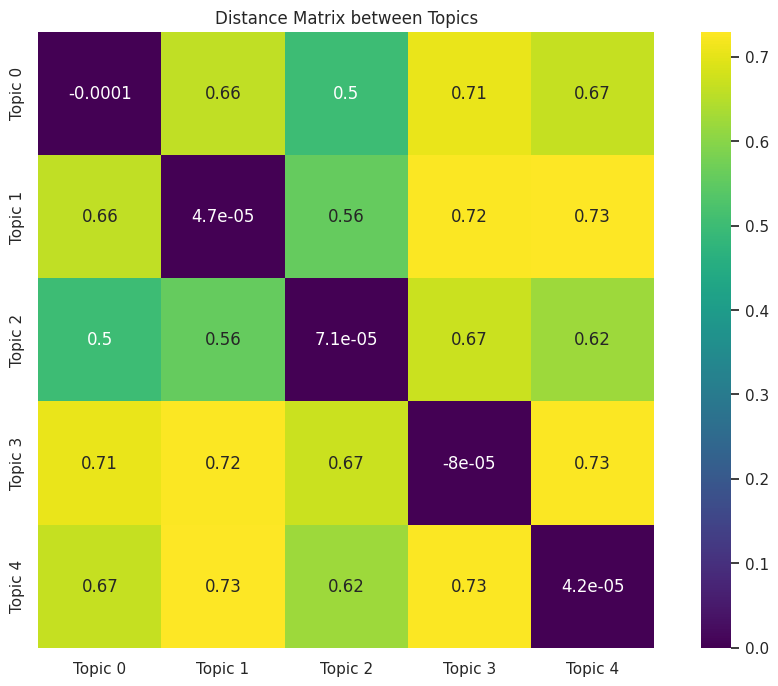

In [ ]:
topics_weights = lda_model.get_topics()

cosine_similarities = cosine_similarity(topics_weights)
distance_matrix = 1 - cosine_similarities

plt.figure(figsize=(12, 8))
sns.heatmap(distance_matrix,
            annot=True, cmap='viridis', square=True,
            xticklabels=[f'Topic {i}' for i in range(len(topics_weights))],
            yticklabels=[f'Topic {i}' for i in range(len(topics_weights))])
plt.title('Distance Matrix between Topics')
plt.show()

Nel complesso, le distanze semantiche nella matrice sono relativamente elevate (con valori tra circa 0.5 e 0.73) indicando che i topic generati dal modello tendono a essere distinti tra loro, con poche sovrapposizioni significative. Questo riflette una buona diversità tematica, confermando la bontà del modello di topic modeling.

### Distribuzione dei topic nelle email spam

In conclusione, può essere utile anche andare a vedere la distribuzione dei 5 topic ottenuti nelle email spam attraverso un grafico a barre. Per fare ciò viene innanzitutto calcolata la *topics_distribution* tramite la funzione *get_document_topics*. In questo modo si ottiene per ciascuna email un insieme di tuple costituite dall'id del topic, che varia da 0 a 4, e la relativa probabilità che tale email appartenga al topic (se la probabilità è nulla non viene considerato il topic e viene omessa la tupla). Dopodichè viene effettuato il conteggio dei topic presenti in ciascuna email utilizzando una probabilità minima oltre il quale il topic viene considerato, *threshold=0.2*. Si sceglie il 20 % poichè è il valore di probabilità che si avrebbe se ogni topic avesse la stessa importanza. Infine, viene mandato a schermo il barplot utilizzando seaborn.

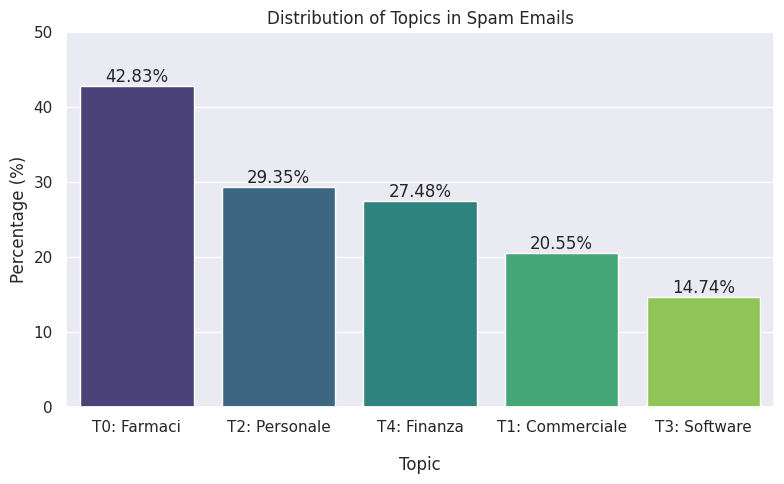

In [ ]:
topic_names = ['T0: Farmaci',
               'T1: Commerciale',
               'T2: Personale',
               'T3: Software',
               'T4: Finanza']

topics_distribution = [lda_model.get_document_topics(email) for email in corpus]
topic_counts = [0] * len(topic_names)

threshold = 0.2

for topic_distribution in topics_distribution:
    for topic_id, topic_proba in topic_distribution:
        if topic_proba > threshold:
            topic_counts[topic_id] += 1

num_spam_emails = len(X_spam)
topic_percentages = [(count / num_spam_emails) * 100 for count in topic_counts]

sorted_indices = sorted(range(len(topic_percentages)),
                        key=lambda i: topic_percentages[i],
                        reverse=True)
sorted_percentages = [topic_percentages[i] for i in sorted_indices]
sorted_topic_names = [topic_names[i] for i in sorted_indices]

plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_topic_names,
            y=sorted_percentages,
            hue=topic_names,
            legend=False,
            palette='viridis')
plt.xlabel('Topic', labelpad=15)
plt.ylabel('Percentage (%)')
plt.yticks(range(0, 60, 10))
plt.title('Distribution of Topics in Spam Emails')

for i, percentage in enumerate(sorted_percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()

Risulta evidente come il topic maggiormente presente tra le mail spam è il topic 0, riguardante la vendita di farmaci, presente nel 42.83 % dei casi, a seguire tutti gli altri topic: topic 2 (personale) 29.15 %, topic 4 (finanza) 27.42 %, topic 1 (commerciale) 20.61 % e topic 3 (software) 14.81 %. Questo risultato  potrebbe riflettere l'interesse particolare dei truffatori per la vendita di farmaci sensibili come viagra e cialis.

## **NER - ORGANIZATIONS**


L'ultima attività da svolgere è estrarre dalle email ham le informazioni sulle organizzazioni menzionate. Si tratta di un task di **Named Entity Recognition (NER)**, sottoclasse dell'Information Extraction attraverso cui è possibile identificare entità nel testo e associarle alle corrispondenti categorie semantiche.

Come primo passaggio viene definito l'array contenente esclusivamente le email ham *X_ham*.

In [ ]:
X_ham = df[df['label_num'] == 0]['text'].values

print(f'Number of ham emails: {len(X_ham)}')
print(f'First ham email: {X_ham[0]}')

Number of ham emails: 3672
First ham email: enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purpose


Per effettuare la NER viene utilizzato il modello *en_core_web_lg* della libreria *spacy*, una libreria di elaborazione del linguaggio naturale. Tale modello è in lingua inglese ed è pre-addestrato su un numero più elevato di parole rispetto ai modelli più piccoli *en_core_web_md* e *en_core_web_sm*. Di seguito viene quindi scaricato il modello *en_core_web_lg* e caricato nell'ambiente tramite la funzione *load* di spacy.

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_lg')

Viene allora definita la funzione *extract_organizations* che utilizza il modello *en_core_web_lg* di spacy per estrarre il nome delle organizzazioni "ORG" da un testo in input. Il risultato è un set contenente i nomi delle organizzazioni trovate.

In [ ]:
def extract_organizations(text):

    '''
    Extracts named organizations from the given text using spaCy's named entity
    recognition.

    This function processes the input text using spaCy's NLP model to identify
    named entities of type "ORG", which correspond to organizations. It returns
    a set of unique organization names found in the text.

    Parameters:
    - text (str): The input text from which organizations will be extracted.

    Returns:
    - set: A set of organization names (strings) identified in the text.
    '''

    doc = nlp(text)

    return {ent.text for ent in doc.ents if ent.label_ == 'ORG'}

Utilizzando la funzione *extract_organizations* appena creata vengono estratte tutte le organizzazioni presenti nelle email ham e vengono stampate insieme alle loro frequenze assolute (si utilizza *Counter* della libreria *collections*).

In [ ]:
all_orgs = []

for sentence in X_ham:
    orgs_in_email = set(extract_organizations(sentence))
    all_orgs.extend(orgs_in_email)

org_freq = Counter(all_orgs)

sorted_org_freq = org_freq.most_common()

print(f'Number of organizations found: {len(all_orgs)}')
print(f'Number of unique organizations found: {len(org_freq)}')

print('\nFrequencies of organizations found:\n')
for org, freq in sorted_org_freq:
    print(f'{org}: {freq}')

Number of organizations found: 7628
Number of unique organizations found: 3122

Frequencies of organizations found:

enron: 447
xl: 210
teco: 168
noms: 137
sitara: 117
pat clynes corp enron: 114
hplo: 95
north america corp: 88
tenaska: 87
iferc: 70
daren j farmer: 58
daren: 53
daren j: 51
calpine daily gas: 48
clem: 47
lst: 46
calpine daily: 44
lsp: 42
exxon: 41
txu: 38
mmbtus: 38
corp enron: 34
cec: 32
enron north america corp: 29
enron capital trade resource corp: 27
el paso: 24
fyi: 24
daren fyi bob: 22
lone star: 22
darrel: 22
houston pipe line: 20
valero: 20
mccoy corp enron: 20
pat clynes corp enron enron daren j: 20
dth: 20
p: 20
mack corp enron: 19
enron enron: 19
sa: 18
cleburne: 18
aimee: 18
megan parker corp: 17
pat clynes corp enron enron: 17
mtr: 17
centana: 16
writeoff: 14
clem cernosek deal: 14
duke energy: 14
pvr: 14
daren please: 13
equistar: 13
neuweiler: 13
ferc: 13
parker corp enron: 13
tu daren j: 12
nom: 12
hpl feb xl: 12
texas desk: 12
southern union: 12
dfarmer 

Tra tutte le email ham sono state trovate 7628 organizzazioni di cui  3122 distinte, riuscendo a capire che il settore di competenza di queste è il **settore energetico**. Tuttavia, scorrendo le organizzazioni si può notare che spesso una stessa organizzazione è presente con nomi leggermente diversi, dovuti ad esempio alla sede o al settore specifico a cui si riferiscono e può essere quindi più di interesse raggrupparle sotto un unico nome. Si prendono allora in esame le prime 10 organizzazioni più frequenti e per ognuna di esse vengono accorpate tutte le altre contenenti il loro nome. Inoltre, analizzando i risultati, ci si rende conto che spesso non si è in presenza di organizzazioni ma la NER ha confuso termini ricorrenti nelle email con esse, ad esempio *noms*, presente 137 volte, sta per *Natural Gas Operations and Management System* ed è un sistema utilizzato da *Enron*. Vengono quindi stampate le frequenze assolute soltanto delle 10 reali organizzazioni più presenti e costruito il corrispondente barplot con le frequenze relative.

In [ ]:
most_freq_orgs = ['enron', 'xl', 'teco', 'sitara', 'tenaska', 'iferc',
                  'calpine', 'clem', 'lst', 'lsp', 'exxon','txu', 'cec',
                  'el paso', 'lone star', 'houston pipe line', 'valero']

aggregated_freq = defaultdict(int)

for org in most_freq_orgs:
    for name, freq in org_freq.items():
        if org.lower() in name.lower():
            aggregated_freq[org] += freq

sorted_aggregated_freq = sorted(aggregated_freq.items(),
                                key=lambda x: x[1],
                                reverse=True)[:10]

print("Aggregated Frequencies of Most Present Organizations:\n")
for org, freq in sorted_aggregated_freq:
    print(f"{org.capitalize()}: {freq}")

Aggregated Frequencies of Most Present Organizations:

Enron: 1434
Xl: 261
Teco: 179
Sitara: 160
Tenaska: 119
Calpine: 113
Clem: 90
Lst: 79
Iferc: 73
El paso: 56


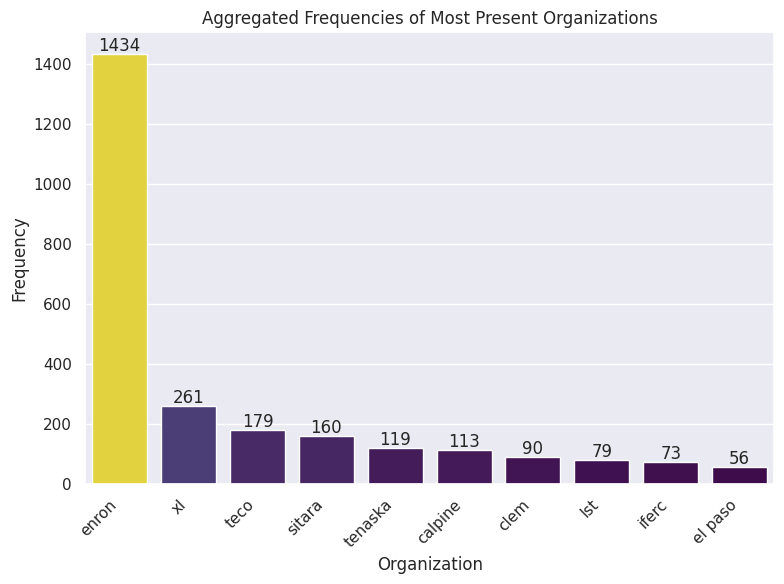

In [ ]:
orgs = [org for org, freq in sorted_aggregated_freq]
freqs = [freq for org, freq in sorted_aggregated_freq]

plt.figure(figsize=(8, 6))
sns.barplot(x=orgs,
            y=freqs,
            hue=freqs,
            legend=False,
            palette='viridis')
plt.xlabel('Organization')
plt.ylabel('Frequency')
plt.title('Aggregated Frequencies of Most Present Organizations')
plt.xticks(rotation=45, ha='right')

for i, freq in enumerate(freqs):
    plt.text(i, freq + 10, f'{freq}', ha='center')

plt.tight_layout()
plt.show()

Si osserva che l'organizzazione più frequente tra le email ham, in maniera netta rispetto a tutte le altre, è ***Enron***, presente 1434 volte. Si tratta di una grande multinazionale statunitense, la *Enron Corporation*, operante nel campo dell'energia. Le altre 9 aziende energetiche più frequenti sono tutte presenti in misura minore: *Xl* Energy 261 volte, *TECO Energy* 179 volte, *Sitara Energy Limited* 160 volte e via via scendendo di numero.<br>
Questi risultati, dunque, possono dare dei suggerimenti per gestire meglio le comunicazioni con le aziende con cui si è maggiormente in contatto, in particolar modo con la *Enron Corporation*.

## Conclusioni

In conclusione, tutti gli obiettivi del progetto prefissati a inizio trattazione sono stati realizzati efficacemente:
* É stato addestrato un classificatore anti-spam molto efficiente, una SVM con un'accuracy del 99 % che permette di ridurre significativamente il volume di email indesiderate che raggiungono la casella di posta. In questo modo si ottimizza la gestione delle comunicazioni aziendali.
* Sono stati individuati 5 topic principali presenti nelle email spam (farmaci, commerciale, personale, software e finanza) ottenendo preziose informazioni sui trend, tematiche e schemi ricorrenti e permettendo di conseguenza di potenziare le strategie di cybersecurity.
* É stata calcolata la distanza semantica tra i topic ottenuti che è sempre abbastanza elevata (valori tra circa 0.5 e 0.73) e consente quindi di ottimizzare le difese contro un'ampia gamma di attacchi.
* Sono state estratte le organizzazioni presenti nelle email leggittime e ciò può essere sfruttato per migliorare i processi di business intelligence e gestire meglio le comunicazioni con clienti e partner. In particolar modo si è visto che moltissime delle comunicazioni via email avvengono con la multinazionale energetica statunitense *Enron Corporation*.

Le soluzioni ottenute permetteranno di incrementare la sicurezza delle comunicazioni e migliorerà i processi decisionali aziendali, generando un vantaggio competitivo nel settore.

